###**Introduction**
In this project, we aim to develop a predictive model to determine customer churn for a telecommunications company. Churn, in this context, refers to the likelihood of a customer leaving the service provider. Understanding and predicting churn is crucial for businesses as it helps in retaining valuable customers and improving overall business performance. The project involves several key steps:

####**Data Exploration and Preparation:**
We start by exploring the dataset to understand its structure and content. This includes handling missing values, visualizing data distributions, and performing necessary data transformations.

####**Feature Engineering and Preprocessing:**
We categorize features into numerical and categorical types and apply appropriate preprocessing techniques. This involves standardization for numerical features, one-hot encoding for categorical features, and label encoding where necessary.

####**Model Selection and Tuning:**
We employ various machine learning algorithms, specifically focusing on Random Forests and Logistic Regression. We perform hyperparameter tuning using GridSearchCV to optimize model performance. The goal is to find the best parameters that enhance the predictive accuracy of our models.

####**Model Evaluation:**
We evaluate the performance of the models using various metrics such as accuracy, precision, recall, F1-score, ROC curve, and confusion matrix. This helps in understanding how well our models can predict customer churn.

####**Model Comparison and Interpretation:**
We compare the performance of different models and analyze feature importance to gain insights into the factors driving customer churn. The aim is to select the best-performing model and interpret its results to guide business strategies.

###**Loading Libraries**

In [92]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

In [93]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

###**Loading and representing data**

In [94]:
#loading data
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [95]:
# Displaying DataFrame
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [96]:
# Displaying basic information about the DataFrame
print("\nDataFrame Info:")
print(df.info())




DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 no

In [97]:
# Displaying summary statistics
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


In [98]:
df.shape

(7043, 21)

In [99]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [100]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

###**Visualize the data**

First few rows of the DataFrame:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV Str

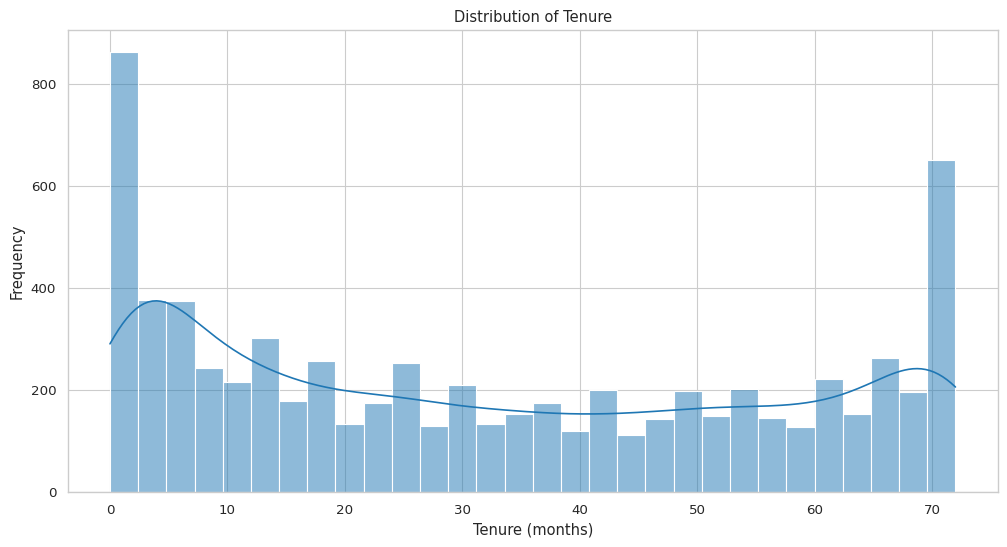

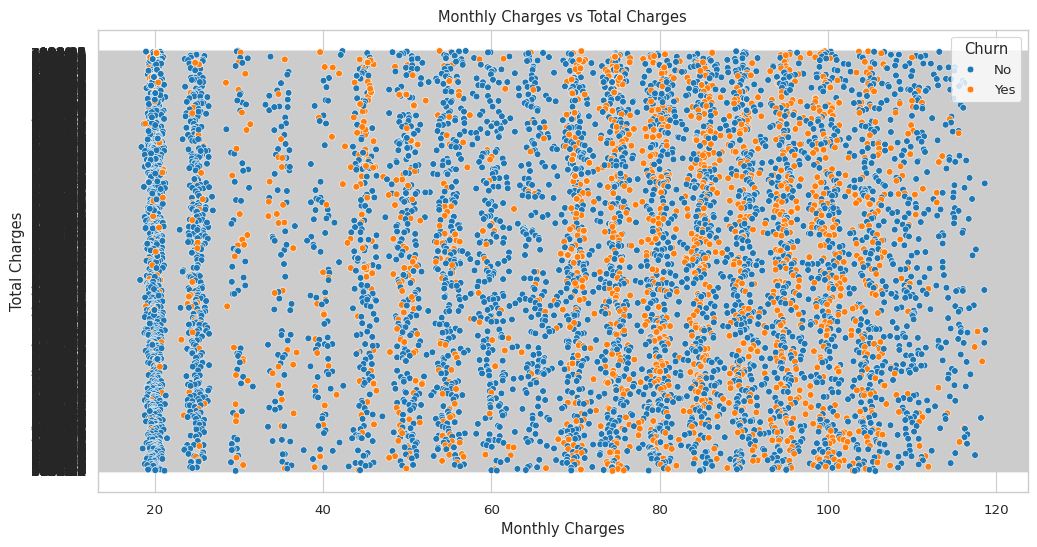

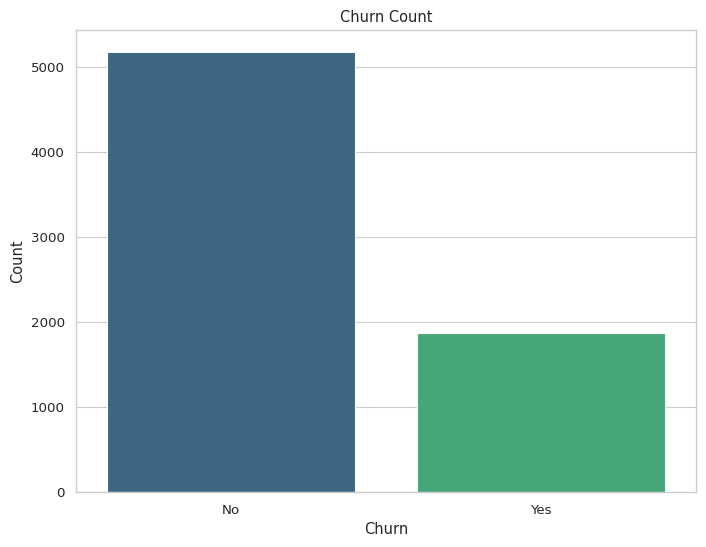

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading data
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

# Displaying the first few rows of the DataFrame
print("First few rows of the DataFrame:")
print(df.head())

# Plotting the distribution of numerical features
plt.figure(figsize=(12, 6))
sns.histplot(df['tenure'], kde=True, bins=30)
plt.title('Distribution of Tenure')
plt.xlabel('Tenure (months)')
plt.ylabel('Frequency')
plt.show()

# Visualizing the relationship between Monthly Charges and Total Charges
plt.figure(figsize=(12, 6))
sns.scatterplot(x='MonthlyCharges', y='TotalCharges', hue='Churn', data=df)
plt.title('Monthly Charges vs Total Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Total Charges')
plt.legend(title='Churn')
plt.show()

# Plotting the count of churned vs non-churned customers
plt.figure(figsize=(8, 6))
sns.countplot(x='Churn', data=df, palette='viridis')
plt.title('Churn Count')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()


First few rows of the DataFrame:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV Str

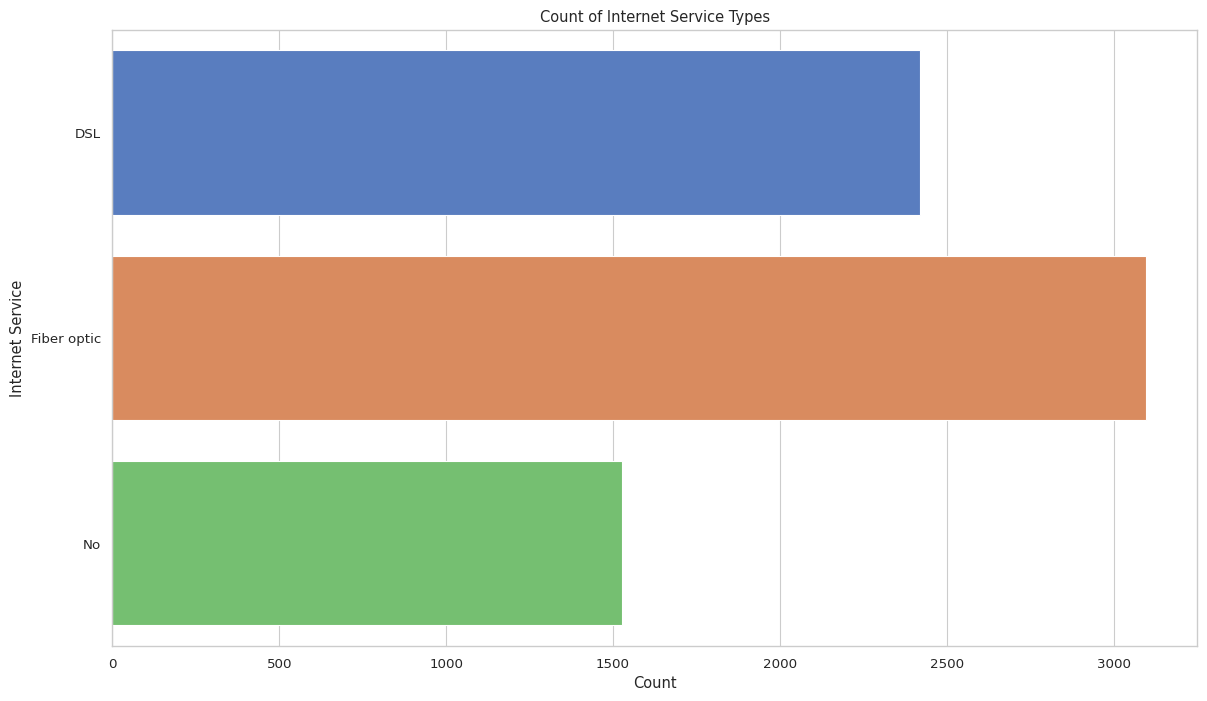

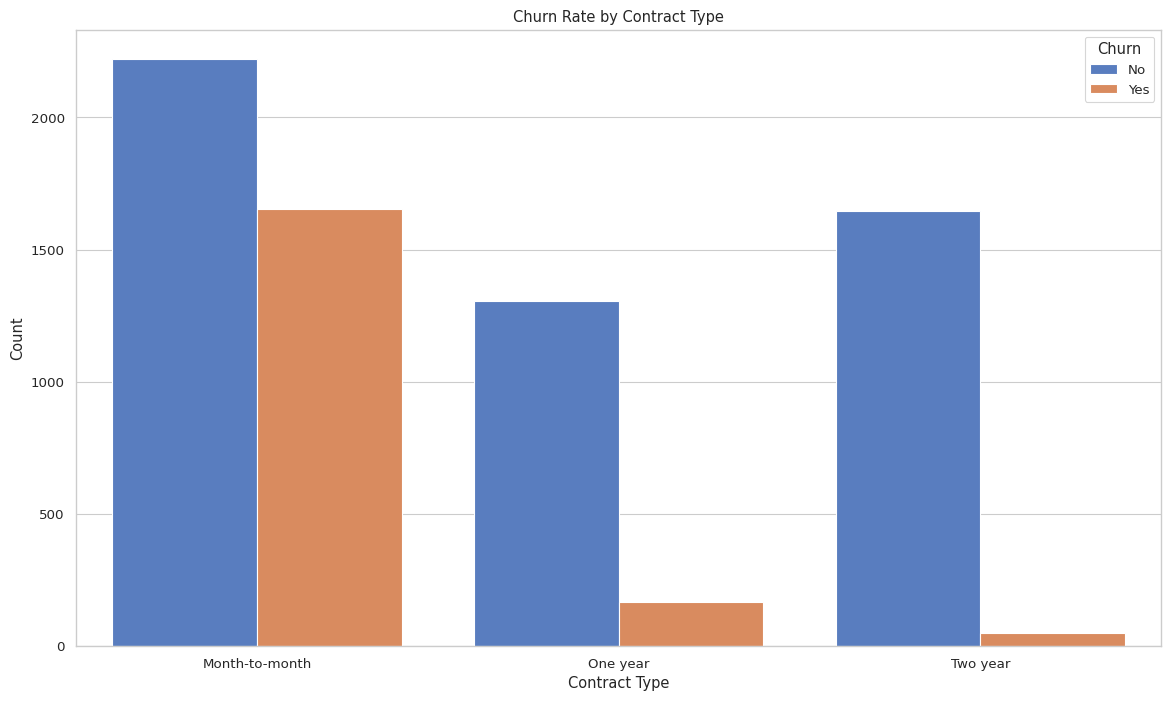

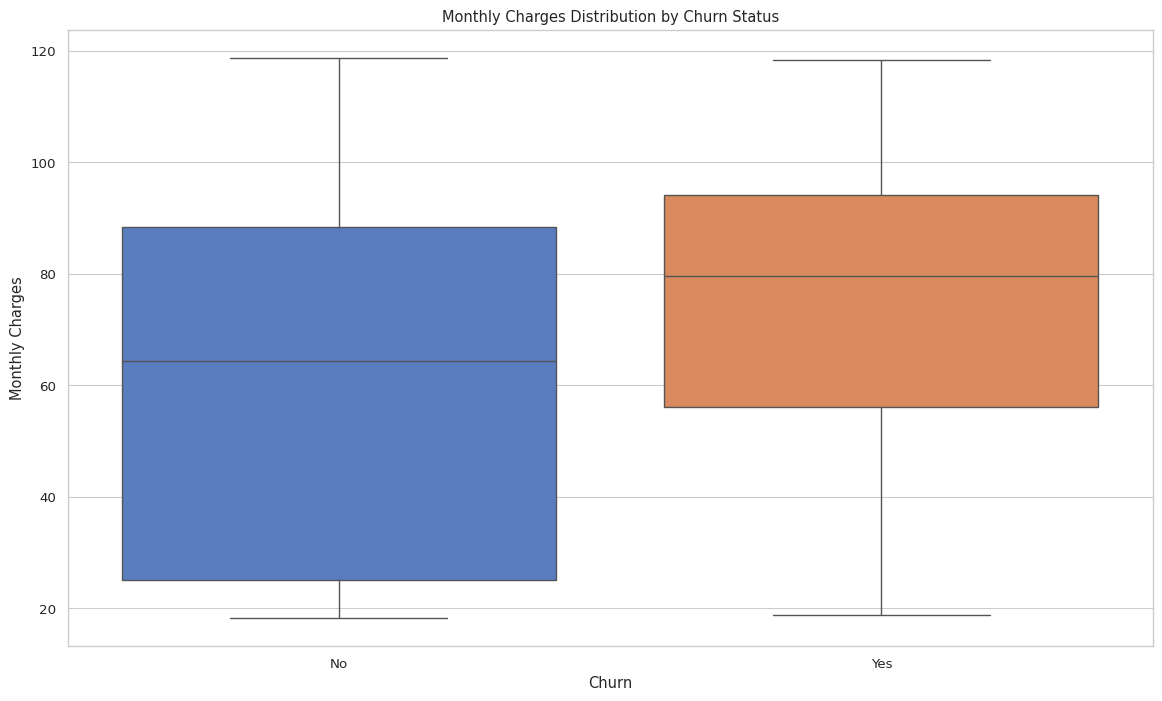

In [102]:

# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

# Displaying the first few rows of the DataFrame
print("First few rows of the DataFrame:")
print(df.head())

# Plotting the count of each category in a categorical column
plt.figure(figsize=(14, 8))
sns.countplot(y='InternetService', data=df, palette='muted')
plt.title('Count of Internet Service Types')
plt.xlabel('Count')
plt.ylabel('Internet Service')
plt.show()

# Visualizing the churn rate across different contract types
plt.figure(figsize=(14, 8))
sns.countplot(x='Contract', hue='Churn', data=df, palette='muted')
plt.title('Churn Rate by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.legend(title='Churn')
plt.show()

# Plotting a box plot to visualize the distribution of Monthly Charges by Churn status
plt.figure(figsize=(14, 8))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette='muted')
plt.title('Monthly Charges Distribution by Churn Status')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.show()


First few rows of the DataFrame:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV Str

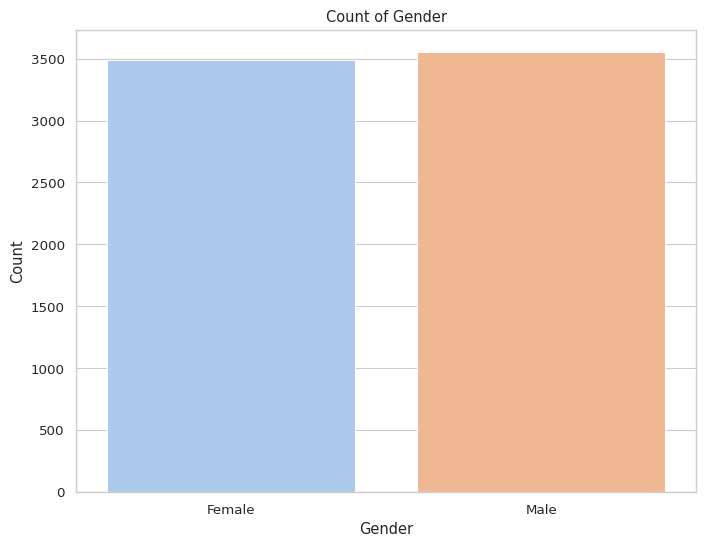

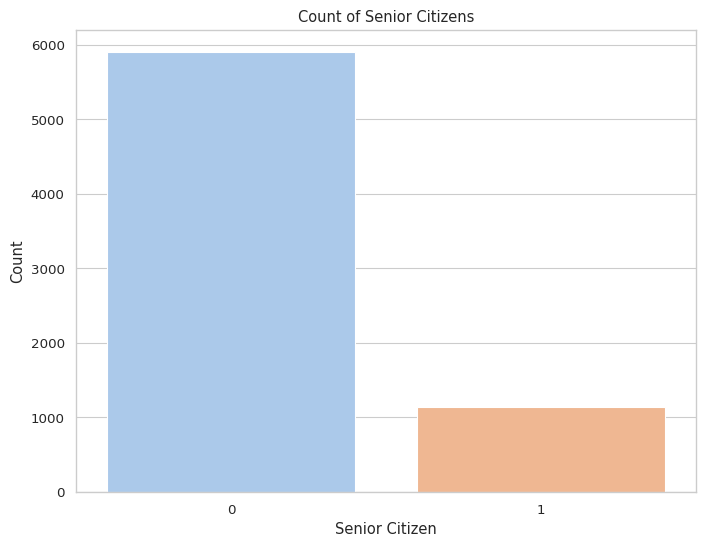

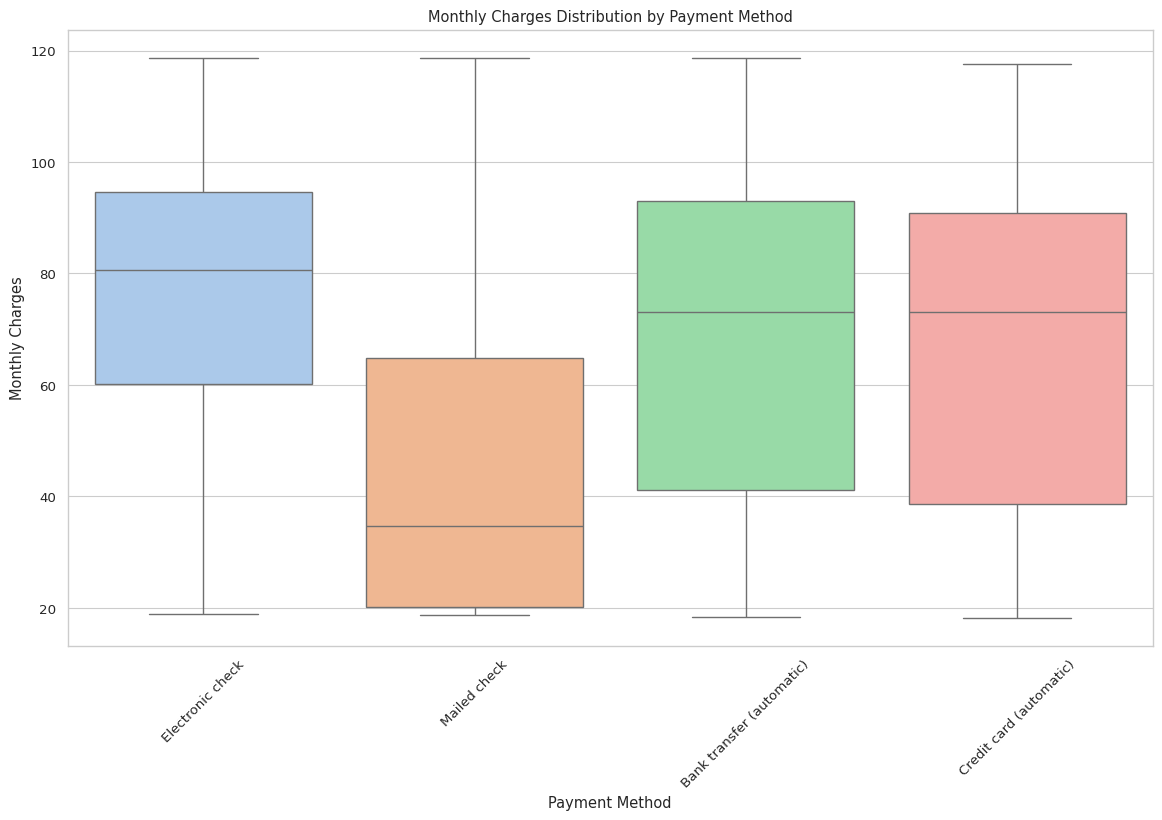

In [103]:

# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

# Displaying the first few rows of the DataFrame
print("First few rows of the DataFrame:")
print(df.head())

# Plotting the count of gender
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', data=df, palette='pastel')
plt.title('Count of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Plotting the count of SeniorCitizen
plt.figure(figsize=(8, 6))
sns.countplot(x='SeniorCitizen', data=df, palette='pastel')
plt.title('Count of Senior Citizens')
plt.xlabel('Senior Citizen')
plt.ylabel('Count')
plt.show()

# Plotting the distribution of Monthly Charges by Payment Method
plt.figure(figsize=(14, 8))
sns.boxplot(x='PaymentMethod', y='MonthlyCharges', data=df, palette='pastel')
plt.title('Monthly Charges Distribution by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Monthly Charges')
plt.xticks(rotation=45)
plt.show()


***

###**Visualize missing values**

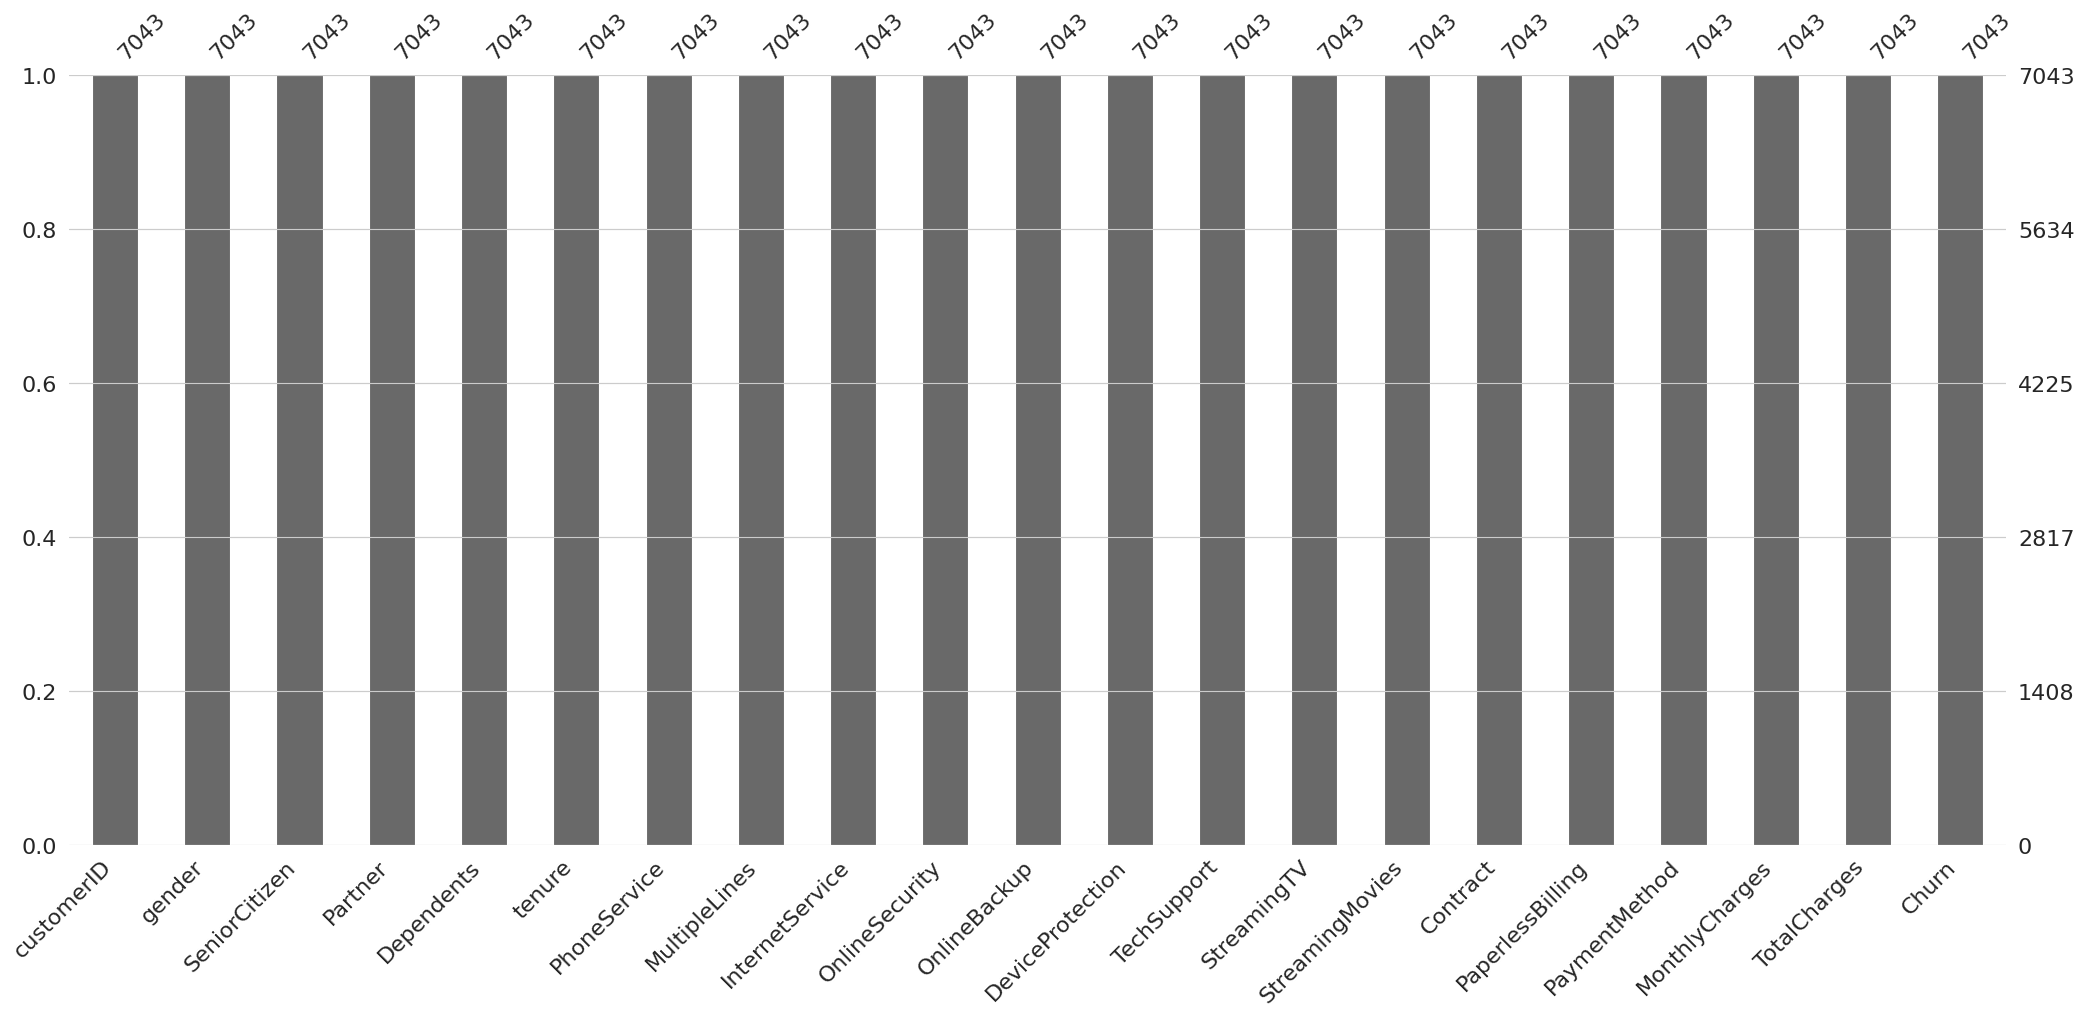

In [104]:
# Visualize missing values
plt.figure(figsize=(12, 6))
msno.bar(df)
plt.show()

***

###**Data Manipulation**

In [105]:
df = df.drop(['customerID'], axis = 1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [106]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [107]:
df[np.isnan(df['TotalCharges'])]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [108]:
df[df['tenure'] == 0].index

Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [109]:
df.drop(labels=df[df['tenure'] == 0].index, axis=0, inplace=True)
df[df['tenure'] == 0].index

Index([], dtype='int64')

In [110]:
df.fillna(df["TotalCharges"].mean())

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [111]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [112]:
df["SeniorCitizen"]= df["SeniorCitizen"].map({0: "No", 1: "Yes"})
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


###**Visualization of each feature**

In [113]:
# Labels for the pie charts
g_labels = ['Male', 'Female']
c_labels = ['No', 'Yes']

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])

# Adding Gender pie chart
fig.add_trace(go.Pie(labels=g_labels, values=df['gender'].value_counts(), name="Gender"),
              1, 1)

# Adding Churn pie chart
fig.add_trace(go.Pie(labels=c_labels, values=df['Churn'].value_counts(), name="Churn"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

# Update layout to add title and annotations
fig.update_layout(
    title_text="Gender and Churn Distributions",
    annotations=[dict(text='Gender', x=0.16, y=0.5, font_size=20, showarrow=False),
                 dict(text='Churn', x=0.84, y=0.5, font_size=20, showarrow=False)]
)

# Show the figure
fig.show()

* 26.6 % of customers switched to another firm.
* Customers are 49.5 % female and 50.5 % male.

In [114]:
df["Churn"][df["Churn"]=="No"].groupby(by=df["gender"]).count()

gender
Female    2544
Male      2619
Name: Churn, dtype: int64

In [115]:
df["Churn"][df["Churn"]=="Yes"].groupby(by=df["gender"]).count()

gender
Female    939
Male      930
Name: Churn, dtype: int64

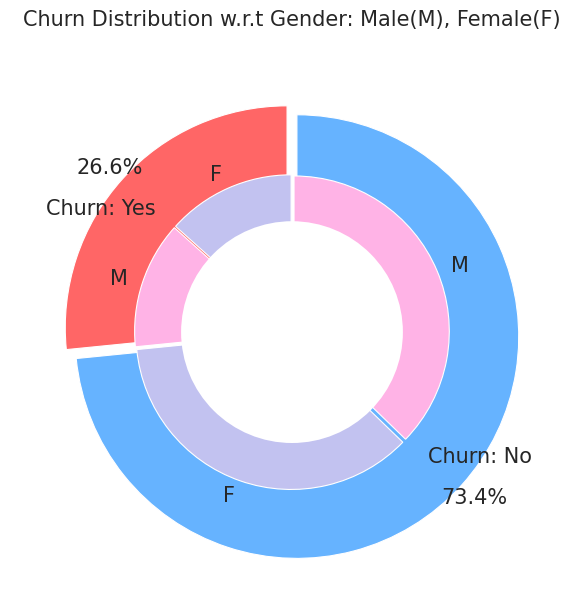

In [116]:
# Define values and labels
labels = ["Churn: Yes", "Churn: No"]
values = [df[df['Churn'] == 'Yes'].shape[0], df[df['Churn'] == 'No'].shape[0]]
labels_gender = ["F", "M", "F", "M"]
sizes_gender = [
    df[(df['Churn'] == 'Yes') & (df['gender'] == 'Female')].shape[0],
    df[(df['Churn'] == 'Yes') & (df['gender'] == 'Male')].shape[0],
    df[(df['Churn'] == 'No') & (df['gender'] == 'Female')].shape[0],
    df[(df['Churn'] == 'No') & (df['gender'] == 'Male')].shape[0]
]
colors = ['#ff6666', '#66b3ff']
colors_gender = ['#c2c2f0', '#ffb3e6', '#c2c2f0', '#ffb3e6']
explode = (0.3, 0.3)
explode_gender = (0.1, 0.1, 0.1, 0.1)
textprops = {"fontsize": 15}

# Create figure and axis
plt.figure(figsize=(6, 6))

# Plot outer pie (churn distribution)
plt.pie(values, labels=labels, autopct='%1.1f%%', pctdistance=1.08, labeldistance=0.8,
        colors=colors, startangle=90, frame=True, explode=explode, radius=10,
        textprops=textprops, counterclock=True)

# Plot inner pie (gender distribution within churn)
plt.pie(sizes_gender, labels=labels_gender, colors=colors_gender, startangle=90,
        explode=explode_gender, radius=7, textprops=textprops, counterclock=True)

# Draw center circle to make it a donut chart
centre_circle = plt.Circle((0, 0), 5, color='black', fc='white', linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Title and layout adjustments
plt.title('Churn Distribution w.r.t Gender: Male(M), Female(F)', fontsize=15, y=1.1)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.show()

* There is negligible difference in customer percentage/ count who chnaged the service provider. Both genders behaved in similar fashion when it comes to migrating to another service provider/firm.

In [117]:
# Create histogram
fig = px.histogram(df, x="Churn", color="Contract", barmode="group",
                   title="<b>Customer Contract Distribution</b>")

# Update layout
fig.update_layout(width=700, height=500, bargap=0.1)

# Show plot
fig.show()

* About 75% of customer with Month-to-Month Contract opted to move out as compared to 13% of customrs with One Year Contract and 3% with Two Year Contract

In [118]:
# Prepare data for the pie chart
labels = df['PaymentMethod'].unique()
values = df['PaymentMethod'].value_counts()

# Create pie chart with a hole (donut chart)
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])

# Update layout with title
fig.update_layout(title_text="<b>Payment Method Distribution</b>")

# Show plot
fig.show()

In [119]:
# Create histogram
fig = px.histogram(df, x="Churn", color="PaymentMethod",
                   title="<b>Customer Payment Method Distribution w.r.t. Churn</b>")

# Update layout
fig.update_layout(width=700, height=500, bargap=0.1)

# Show plot
fig.show()

* Major customers who moved out were having Electronic Check as Payment Method.
* Customers who opted for Credit-Card automatic transfer or Bank Automatic Transfer and Mailed Check as Payment Method were less likely to move out.  

In [120]:

# Define custom color map
color_map = {"Yes": '#FFA15A', "No": '#00CC96'}

# Create histogram
fig = px.histogram(df, x="Churn", color="Partner", barmode="group",
                   title="<b>Churn Distribution w.r.t. Partners</b>",
                   color_discrete_map=color_map)

# Update layout
fig.update_layout(width=700, height=500, bargap=0.1)

# Show plot
fig.show()


* Customers that doesn't have partners are more likely to churn

In [121]:

# Define custom color map
color_map = {1: '#00CC96', 0: '#B6E880'}

# Create histogram
fig = px.histogram(df, x="Churn", color="SeniorCitizen",
                   title="<b>Churn Distribution w.r.t. Senior Citizen</b>",
                   color_discrete_map=color_map)

# Update layout
fig.update_layout(width=700, height=500, bargap=0.1)

# Show plot
fig.show()


* It can be observed that the fraction of senior citizen is very less.
* Most of the senior citizens churn.

In [122]:


# Define custom color map
color_map = {"Yes": "#FF97FF", "No": "#AB63FA"}

# Create histogram
fig = px.histogram(df, x="Churn", color="OnlineSecurity", barmode="group",
                   title="<b>Churn w.r.t Online Security</b>",
                   color_discrete_map=color_map)

# Update layout
fig.update_layout(width=700, height=500, bargap=0.1)

# Show plot
fig.show()


* Most customers churn in the absence of online security,

In [123]:


# Define custom color map
color_map = {"Yes": '#FFA15A', "No": '#00CC96'}

# Create histogram
fig = px.histogram(df, x="Churn", color="PaperlessBilling",
                   title="<b>Churn Distribution w.r.t. Paperless Billing</b>",
                   color_discrete_map=color_map)

# Update layout
fig.update_layout(width=700, height=500, bargap=0.1)

# Show plot
fig.show()


* Customers with Paperless Billing are most likely to churn.

In [124]:


# Create histogram
fig = px.histogram(df, x="Churn", color="TechSupport", barmode="group",
                   title="<b>Churn Distribution w.r.t. Tech Support</b>")

# Update layout
fig.update_layout(width=700, height=500, bargap=0.1)

# Show plot
fig.show()


* Customers with no TechSupport are most likely to migrate to another service provider.

In [125]:


# Define custom color map
color_map = {"Yes": '#00CC96', "No": '#B6E880'}

# Create histogram
fig = px.histogram(df, x="Churn", color="PhoneService",
                   title="<b>Churn Distribution w.r.t. Phone Service</b>",
                   color_discrete_map=color_map)

# Update layout
fig.update_layout(width=700, height=500, bargap=0.1)

# Show plot
fig.show()


* Very small fraction of customers don't have a phone service and out of that, 1/3rd Customers are more likely to churn.

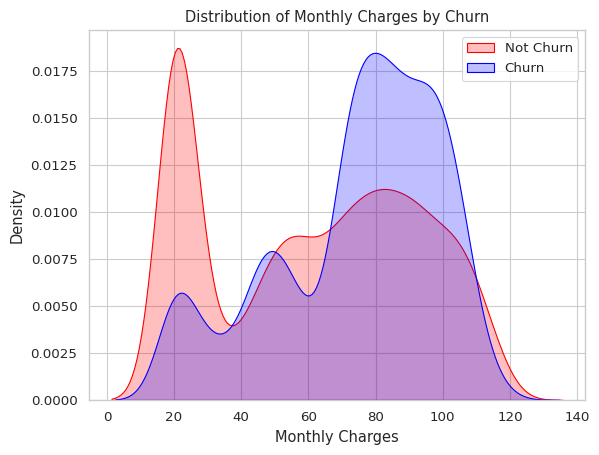

In [126]:


# Set Seaborn context and font scale
sns.set_context("paper", font_scale=1.1)

# Create KDE plot
ax = sns.kdeplot(df.MonthlyCharges[df["Churn"] == 'No'], color="Red", shade=True, label="Not Churn")
ax = sns.kdeplot(df.MonthlyCharges[df["Churn"] == 'Yes'], ax=ax, color="Blue", shade=True, label="Churn")

# Customize plot
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of Monthly Charges by Churn')
ax.legend(loc='upper right')

# Show plot
plt.show()


* Customers with higher Monthly Charges are also more likely to churn

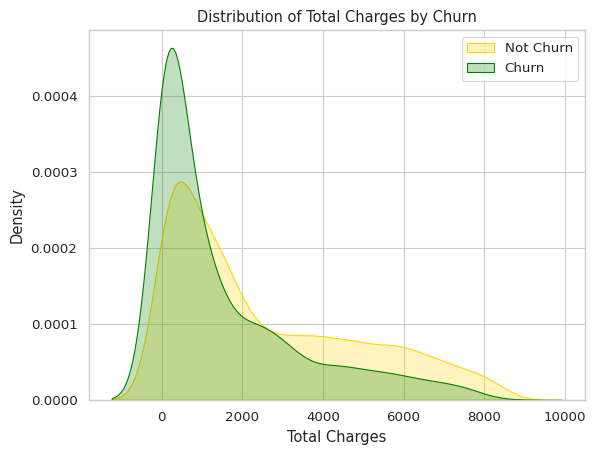

In [127]:

# Set Seaborn context and font scale
sns.set_context("paper", font_scale=1.1)

# Create KDE plot
ax = sns.kdeplot(df.TotalCharges[df["Churn"] == 'No'], color="Gold", shade=True, label="Not Churn")
ax = sns.kdeplot(df.TotalCharges[df["Churn"] == 'Yes'], ax=ax, color="Green", shade=True, label="Churn")

# Customize plot
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('Distribution of Total Charges by Churn')
ax.legend(loc='upper right')

# Show plot
plt.show()


In [128]:


# Create box plot
fig = px.box(df, x='Churn', y='tenure')

# Update y-axis properties
fig.update_yaxes(title_text='Tenure (Months)')

# Update x-axis properties
fig.update_xaxes(title_text='Churn')

# Update layout size and title
fig.update_layout(
    autosize=True, width=750, height=600,
    title_font=dict(size=25, family='Courier'),
    title='<b>Tenure vs Churn</b>'
)

# Show plot
fig.show()


* New customers are more likely to churn

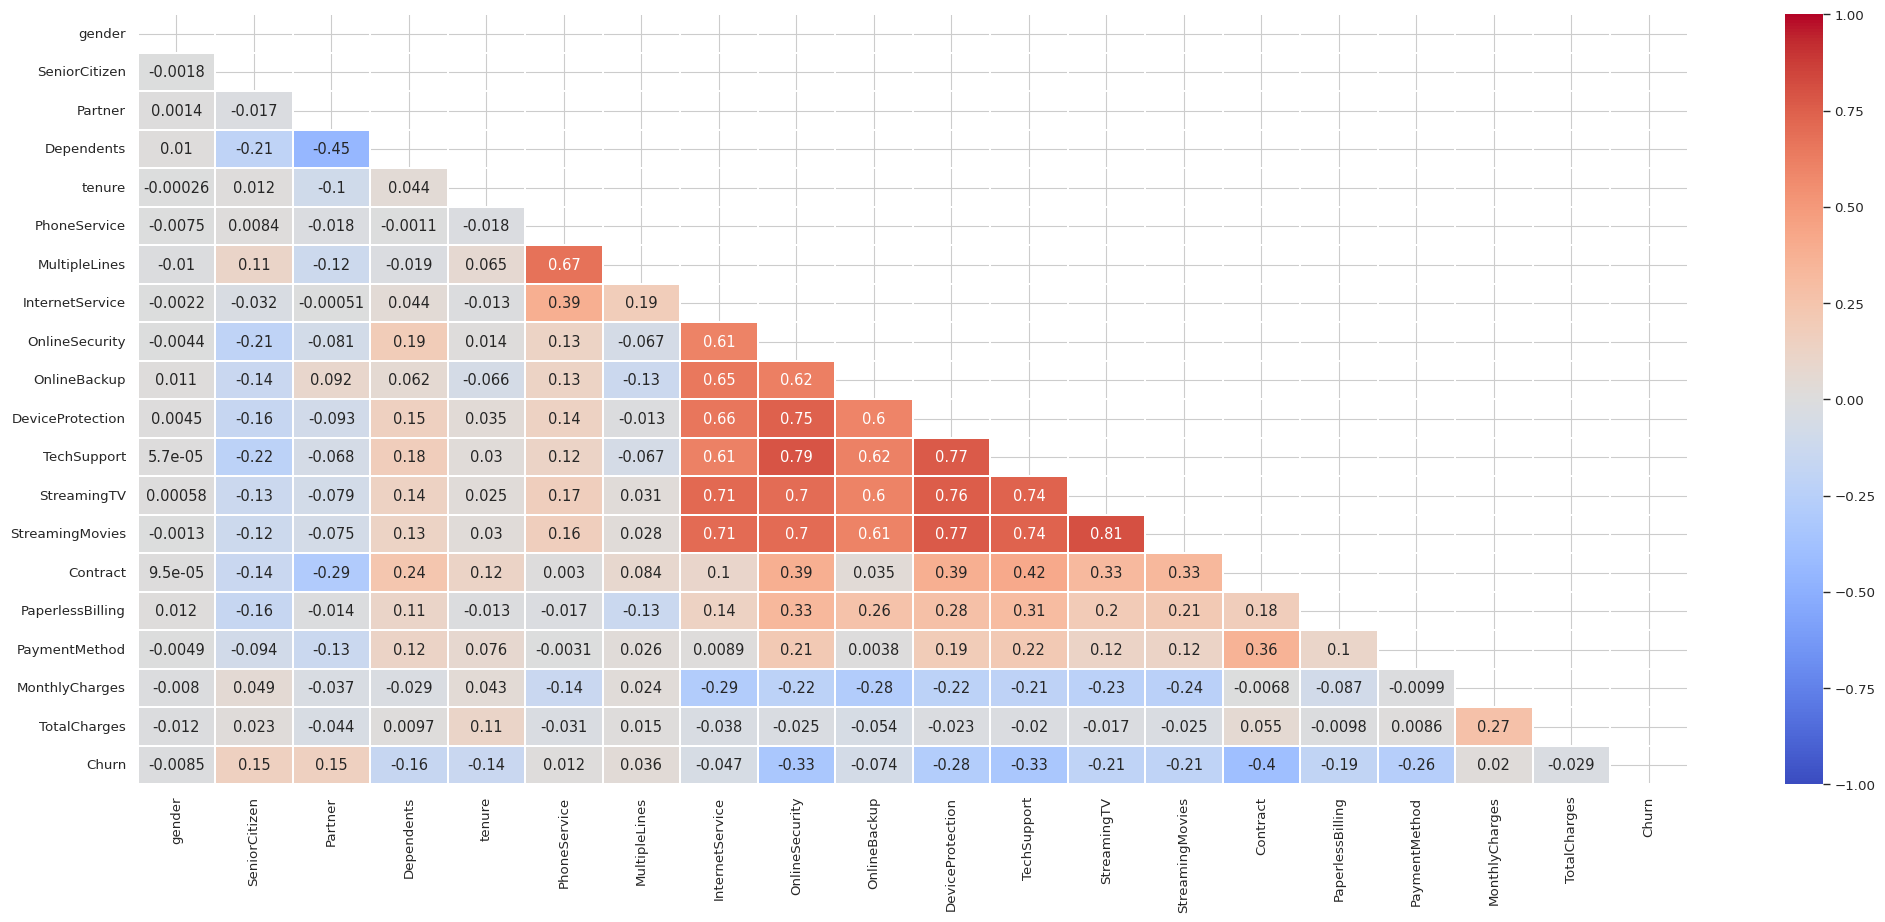

In [129]:


# Encode categorical variables
df_encoded = df.apply(lambda x: pd.factorize(x)[0])

# Compute correlation matrix
corr = df_encoded.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(25, 10))

# Create the heatmap
ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns,
                 annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

# Show the plot
plt.show()


___

###**Data Preprocessing**

<a id = "1111" ></a>
#### **Splitting the data into train and test sets**
<a id = "Split" ></a>

In [130]:
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [131]:
df = df.apply(lambda x: object_to_int(x))
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [132]:
X = df.drop(columns = ['Churn'])
y = df['Churn'].values

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 40, stratify=y)

In [134]:

def distplot(feature, frame, color='r'):
    plt.figure(figsize=(8, 3))
    plt.title(f"Distribution for {feature}")
    ax = sns.histplot(frame[feature], color=color, kde=True)  # Use histplot with kde=True to add KDE
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.show()


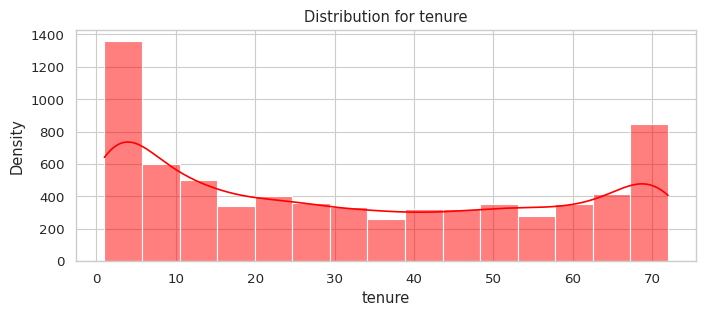

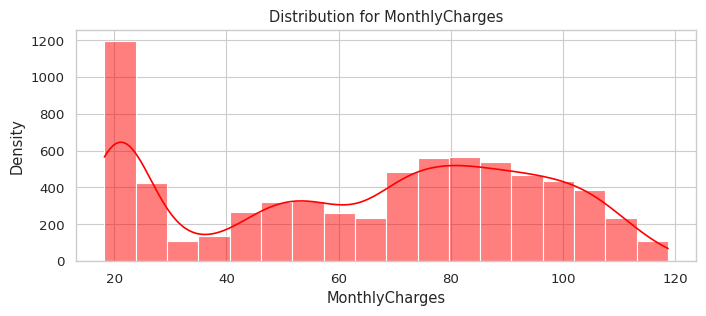

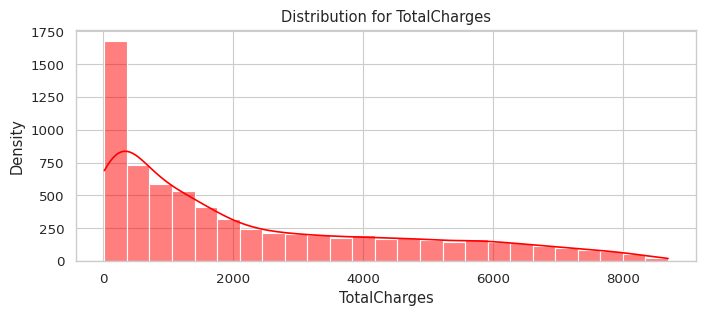

In [135]:
# List of numerical columns
num_cols = ["tenure", 'MonthlyCharges', 'TotalCharges']

# Call the distplot function for each numerical column
for feat in num_cols:
    distplot(feat, df)

Since the numerical features are distributed over different value ranges, I will use standard scalar to scale them down to the same range.

<a id = "111" ></a>
#### **Standardizing numeric attributes**
<a id = "Standardizing" ></a>

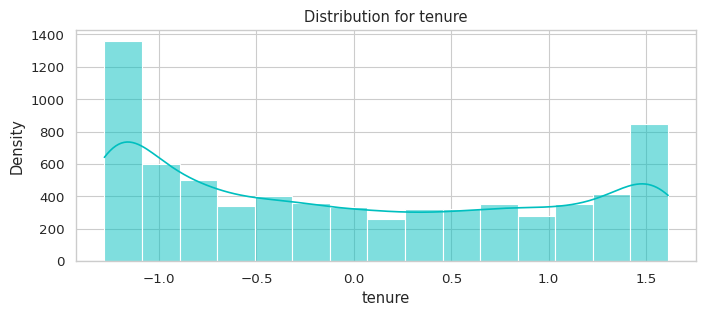

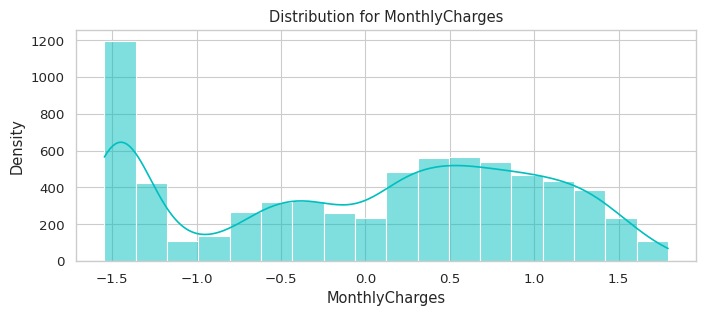

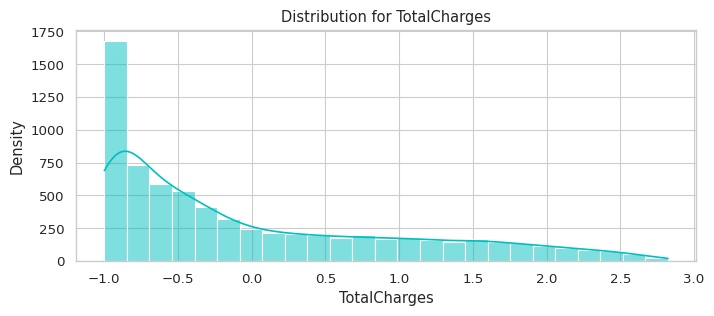

In [136]:
# Standardize the numerical columns
df_std = pd.DataFrame(StandardScaler().fit_transform(df[num_cols].astype('float64')),
                      columns=num_cols)

# Plot distributions for standardized numerical columns
for feat in num_cols:
    distplot(feat, df_std, color='c')

In [137]:

# Define the columns
cat_cols_ohe = ['PaymentMethod', 'Contract', 'InternetService']  # One-hot encoding
cat_cols_le = list(set(X_train.columns) - set(num_cols) - set(cat_cols_ohe))  # Label encoding

print("Columns for One-Hot Encoding:", cat_cols_ohe)
print("Columns for Label Encoding:", cat_cols_le)
# One-Hot Encoding
df_ohe = pd.get_dummies(df, columns=cat_cols_ohe)

# Label Encoding
le = LabelEncoder()
df_le = df.copy()
for col in cat_cols_le:
    df_le[col] = le.fit_transform(df_le[col])

# Combine the results if needed
df_encoded = pd.concat([df_ohe, df_le], axis=1)



Columns for One-Hot Encoding: ['PaymentMethod', 'Contract', 'InternetService']
Columns for Label Encoding: ['StreamingTV', 'SeniorCitizen', 'StreamingMovies', 'gender', 'TechSupport', 'PhoneService', 'PaperlessBilling', 'OnlineBackup', 'DeviceProtection', 'OnlineSecurity', 'Partner', 'Dependents', 'MultipleLines']


In [138]:
scaler= StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

###**Model Evaluations and Predictions**

<a id = "103" ></a>
#### <b> Random Forest</b>
<a id = "rf" ></a>

In [139]:
model_rf = RandomForestClassifier(n_estimators=500 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

0.8137440758293839


In [140]:
print(classification_report(y_test, prediction_test))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1549
           1       0.71      0.51      0.59       561

    accuracy                           0.81      2110
   macro avg       0.77      0.72      0.74      2110
weighted avg       0.80      0.81      0.80      2110



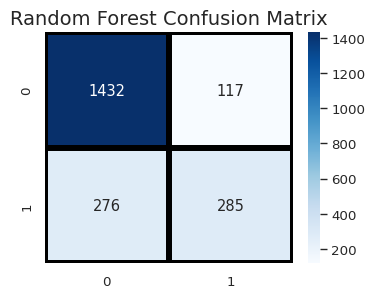

In [141]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, prediction_test)

# Plot confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linecolor="k", linewidths=3)

# Add title
plt.title("Random Forest Confusion Matrix", fontsize=14)

# Show the plot
plt.show()

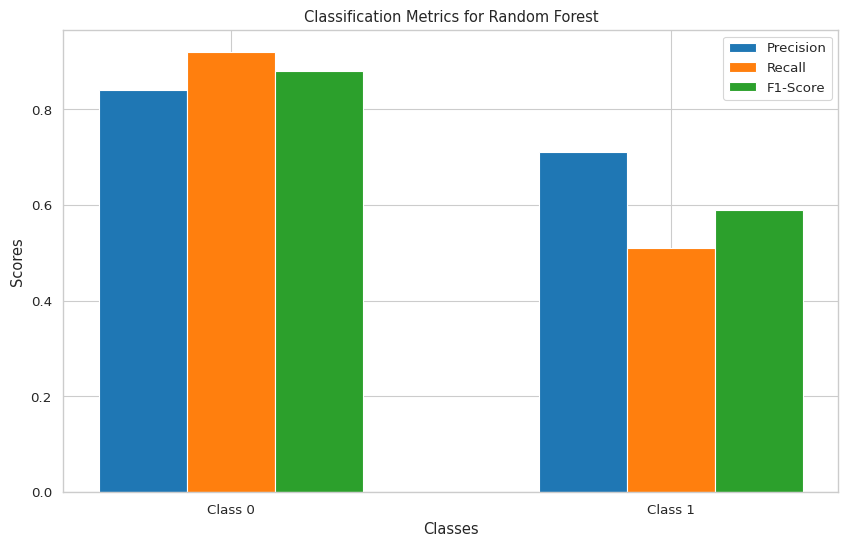

In [142]:

# Define metrics
metrics = {
    'Precision': [0.84, 0.71],
    'Recall': [0.92, 0.51],
    'F1-Score': [0.88, 0.59]
}

# Classes
classes = ['Class 0', 'Class 1']

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

x = np.arange(len(classes))  # the label locations
width = 0.2  # the width of the bars

# Plot each metric
for i, (metric_name, values) in enumerate(metrics.items()):
    ax.bar(x + i * width, values, width, label=metric_name)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Classes')
ax.set_ylabel('Scores')
ax.set_title('Classification Metrics for Random Forest')
ax.set_xticks(x + width)
ax.set_xticklabels(classes)
ax.legend()

plt.show()


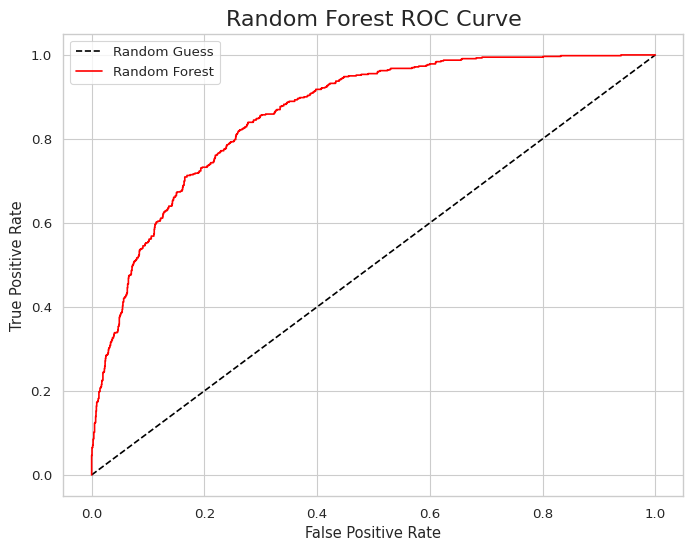

In [143]:
# Predict probabilities
y_rfpred_prob = model_rf.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_rfpred_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')  # Diagonal line
plt.plot(fpr_rf, tpr_rf, label='Random Forest', color='r')  # ROC curve for Random Forest

# Add labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve', fontsize=16)
plt.legend(loc='best')  # Add legend

# Show plot
plt.show()

###**Hyperparameter Tuning**

In [144]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the GridSearchCV
grid_search = GridSearchCV(
    estimator=model_rf,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters found
print(f"Best parameters: {grid_search.best_params_}")

# Print the best score
print(f"Best score: {grid_search.best_score_:.4f}")

# Optionally: Save the best model
best_rf_model = grid_search.best_estimator_


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best score: 0.7995


In [145]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [146]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(C=0.1, penalty='l2')
model_lr.fit(X_train, y_train)


LogisticRegression(C=0.1)

In [147]:
from sklearn.model_selection import cross_val_score


scores = cross_val_score(model_rf, X_train, y_train, cv=8)
print(f"Cross-validation scores: {scores}")


Cross-validation scores: [0.78896104 0.77922078 0.80650407 0.80487805 0.7902439  0.8
 0.80487805 0.79349593]


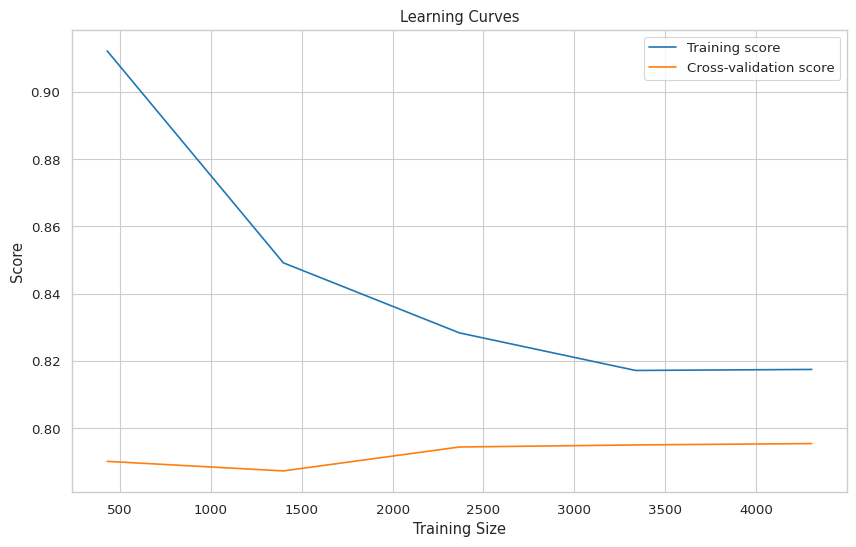

In [148]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    model_rf, X_train, y_train, cv=8, scoring='accuracy', n_jobs=-1
)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Cross-validation score')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.title('Learning Curves')
plt.legend()
plt.show()


<a id = "104" ></a>
#### <b>Logistic Regression</b>
<a id = "lr" ></a>

In [149]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
accuracy_lr = lr_model.score(X_test,y_test)
print("Logistic Regression accuracy is :",accuracy_lr)

Logistic Regression accuracy is : 0.8090047393364929


In [150]:
lr_pred= lr_model.predict(X_test)
report = classification_report(y_test,lr_pred)
print(report)

              precision    recall  f1-score   support

           0       0.86      0.89      0.87      1549
           1       0.66      0.58      0.62       561

    accuracy                           0.81      2110
   macro avg       0.76      0.74      0.75      2110
weighted avg       0.80      0.81      0.81      2110



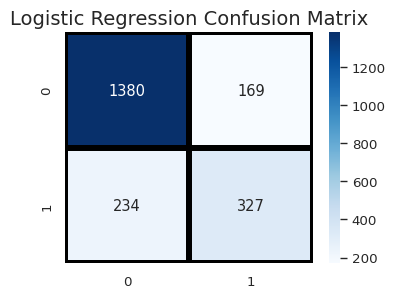

In [151]:

# Compute the confusion matrix
cm = confusion_matrix(y_test, lr_pred)

# Plot confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linecolor="k", linewidths=3)

# Add title
plt.title("Logistic Regression Confusion Matrix", fontsize=14)

# Show the plot
plt.show()


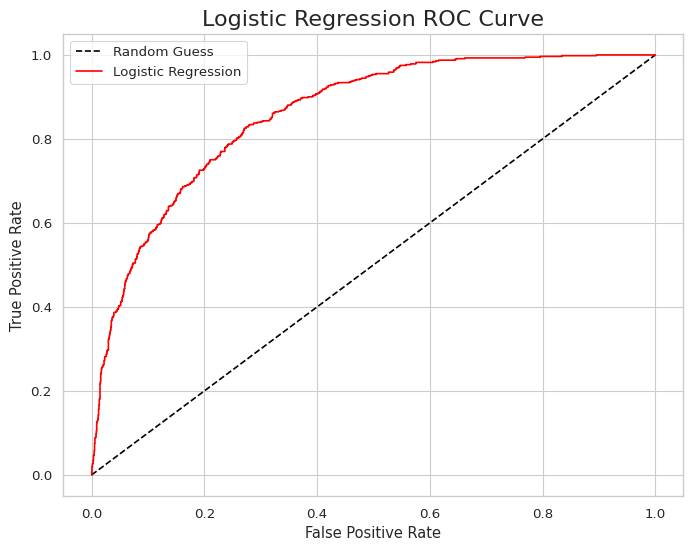

In [152]:

# Predict probabilities for the positive class
y_pred_prob = lr_model.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')  # Diagonal line for random guess
plt.plot(fpr, tpr, label='Logistic Regression', color='r')  # ROC curve for Logistic Regression

# Add labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve', fontsize=16)
plt.legend(loc='best')  # Add legend

# Show the plot
plt.show()


####**Summary**
In this project, we have successfully navigated through the process of predicting customer churn. After data exploration and preprocessing, we trained several models, including Random Forest and Logistic Regression.

We evaluated the model's performance using metrics such as accuracy and F1-score and visualized the results using confusion matrices and ROC curves. The Random Forest model, after fine-tuning, demonstrated significant improvement in predicting churn. We also explored feature importance to understand which factors most influence customer churn.

Overall, this project provides valuable insights into customer retention strategies and highlights the importance of using predictive analytics to address business challenges.






